In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [2]:
batch_size = 32
image_size = (224, 224)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Split 20% of data as validation set
    fill_mode='nearest'
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    r"D:\Harsh\SIG\SEM 3\DL\Plant disease classification\Coffee",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 840 images belonging to 3 classes.


In [5]:
valid_generator = train_datagen.flow_from_directory(
    r"D:\Harsh\SIG\SEM 3\DL\Plant disease classification\Coffee",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 208 images belonging to 3 classes.


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [8]:
model = Sequential()
base_model = ResNet50(weights='imagenet',include_top=False)

In [9]:
model.add(base_model)
model.add(GlobalAveragePooling2D())
#model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dense(3, activation='softmax')) 

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
27/27 [==============================] - 212s 7s/step - loss: 1.1699 - accuracy: 0.5893 - val_loss: 1.7198 - val_accuracy: 0.4183
Epoch 2/50
27/27 [==============================] - 226s 8s/step - loss: 0.7290 - accuracy: 0.7131 - val_loss: 137.4177 - val_accuracy: 0.4231
Epoch 3/50
27/27 [==============================] - 366s 14s/step - loss: 0.6157 - accuracy: 0.7690 - val_loss: 12.8804 - val_accuracy: 0.4231
Epoch 4/50
27/27 [==============================] - 386s 14s/step - loss: 0.5638 - accuracy: 0.7726 - val_loss: 1.0468 - val_accuracy: 0.4183
Epoch 5/50
27/27 [==============================] - 378s 14s/step - loss: 0.5268 - accuracy: 0.8024 - val_loss: 1.4633 - val_accuracy: 0.4183
Epoch 6/50
27/27 [==============================] - 338s 12s/step - loss: 0.4481 - accuracy: 0.8250 - val_loss: 1.9013 - val_accuracy: 0.4183
Epoch 7/50
27/27 [==============================] - 407s 15s/step - loss: 0.4711 - accuracy: 0.8405 - val_loss: 2.5203 - val_accuracy: 0.4183
Epoch

In [13]:
model.save(r"D:\Harsh\SIG\SEM 3\DL\Plant disease classification\coffee_resnet50.h5")

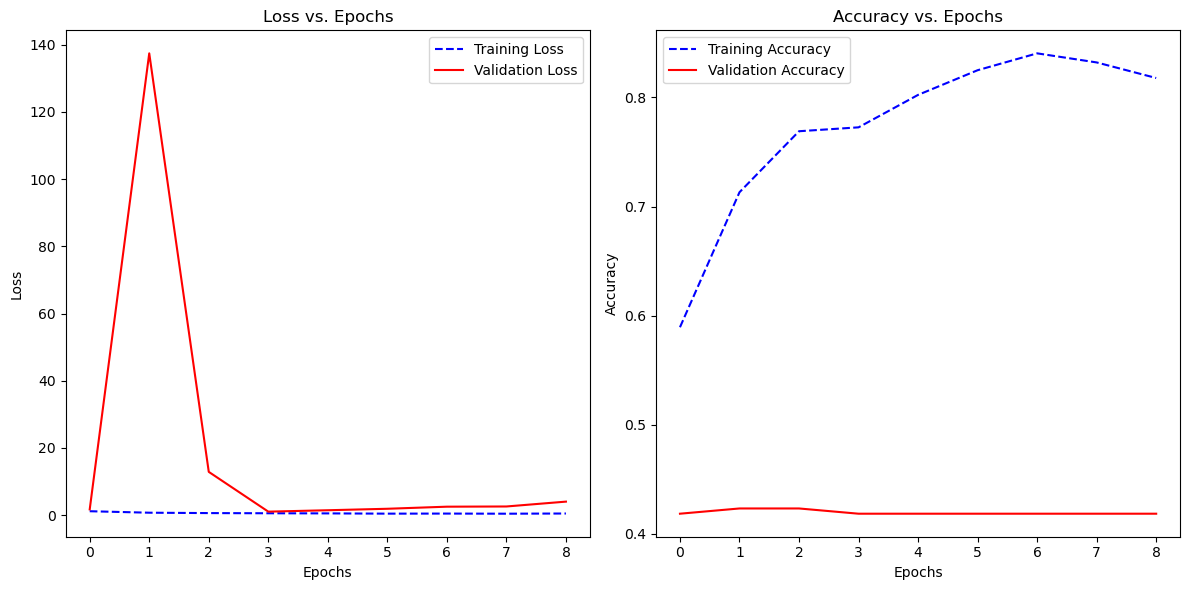

In [14]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue', linestyle='--')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy', color='blue', linestyle='--')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

# Show the plots
plt.tight_layout()
plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [23]:
image_path = "D:\Harsh\SIG\SEM 3\DL\Plant disease classification\Coffee_Test\Healthy.jpg"
img = load_img(image_path, target_size=(224,224))

In [24]:
img_array = img_to_array(img)

In [25]:
img_array = np.expand_dims(img_array, axis=0)

In [26]:
img_array = img_array / 255.0

In [27]:
predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 491ms/step


array([[0.52791196, 0.13703468, 0.3350533 ]], dtype=float32)

In [28]:
predicted_class = np.argmax(predictions)
class_labels = ['Healthy', 'Spider Mite', 'Rust']
predicted_label = class_labels[predicted_class]

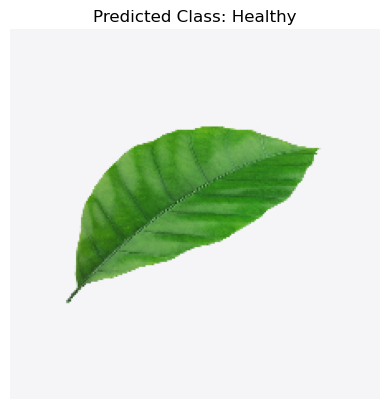

In [29]:
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis('off')
plt.show()